In [1]:
#!conda install -y seaborn
#!conda install -y -c conda-forge scikit-learn 

In [2]:
import numpy as np

In [3]:
win_file_ref = '/Users/lsantuari/Documents/Processed/sv-channels/NA24385/noDEL.npz'
win_file_alt = '/Users/lsantuari/Documents/Processed/sv-channels/NA24385/DEL.npz'

load the windows

In [4]:
npzfile = np.load(win_file_ref, allow_pickle=True, mmap_mode='r')
X_ref = npzfile['data']
y_ref = npzfile['labels']
y_ref = y_ref.item()

In [5]:
npzfile = np.load(win_file_alt, allow_pickle=True, mmap_mode='r')
X_alt = npzfile['data']
y_alt = npzfile['labels']
y_alt = y_alt.item()

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [7]:
channels_names = [
    # coverage
    'coverage',
    'discordant_fwd',
    'discordant_rev',
    'not_proper_pair_fwd',
    'not_proper_pair_rev',
    # snv
    'median_base_quality',
    'median_mapping_quality',
    'non_ref_bases_frequency',
    # clipped reads
    'clipped_left_fwd', 'clipped_left_rev',
    'clipped_right_fwd', 'clipped_right_rev',
    'discordant_clipped_left_fwd', 'discordant_clipped_left_rev',
    'discordant_clipped_right_fwd', 'discordant_clipped_right_rev',
    'INDEL_CIGAR_D_left_fwd', 'INDEL_CIGAR_D_left_rev',
    'INDEL_CIGAR_D_right_fwd', 'INDEL_CIGAR_D_right_rev',
    'INDEL_CIGAR_I_fwd', 'INDEL_CIGAR_I_rev',
    # split reads
    'split_left_fwd', 'split_left_rev',
    'split_right_fwd', 'split_right_rev',
    # clipped read distance
    'clipped_distance_left_fwd', 'clipped_distance_right_fwd', 'clipped_distance_all_fwd',
    'clipped_distance_left_rev', 'clipped_distance_right_rev', 'clipped_distance_all_rev',
    # inversion
    'inversion_before', 'inversion_after',
    'inversion_before_split', 'inversion_after_split',
    # duplication
    'duplication_mate_before', 'duplication_mate_after',
    'duplication_split_mate_before', 'duplication_split_mate_after',
    # inter-chromosomal translocation
    'translocation_opposite_orientation', 'translocation_same_orientation',
    'translocation_opposite_orientation_split', 'translocation_same_orientation_split',
    # split read distance
    'split_distance_left_fwd', 'split_distance_left_rev',
    'split_distance_right_fwd', 'split_distance_right_rev',
    # genmap mappability score
    'genmap_score',
    # one hot encoding of reference
    'one_hot_A', 'one_hot_T', 'one_hot_C', 'one_hot_G', 'one_hot_N',
    # from here on only reads with read in one window and mate on the other are considered
    # All reads
    'common_all_fwd_not_clipped', 'common_all_rev_not_clipped',
    # Split reads
    'common_split_left_fwd', 'common_split_left_fwd', 'common_split_both_sides_fwd',
    'common_split_right_rev', 'common_split_right_rev', 'common_split_both_sides_rev',
    'common_not_split_fwd', 'common_not_split_rev',
    # Clipped reads
    'common_clipped_left_fwd', 'common_clipped_right_fwd',
    'common_clipped_left_rev', 'common_clipped_right_rev',
    'common_clipped_both_sides_fwd', 'common_clipped_both_sides_rev',
    'common_not_clipped_fwd', 'common_not_clipped_rev',
    # Discordant reads
    'common_discordant_fwd', 'common_discordant_rev',
    # SV type channels
    'common_duplication_mate_after', 'common_duplication_mate_before', 
    'common_inversion_mate_after', 'common_inversion_mate_before',
    'common_translocation_opposite', 'common_translocation_same'
]

In [8]:
channels_dict = {i:channels_names[i] for i in np.arange(0, len(channels_names))}
# channels_dict

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
# Create the data
j = 2
l = []
for i in np.random.choice(X_alt.shape[0],j):
    x = X_alt[i,:,:]
    idx = np.array([i for i in np.arange(len(channels_names)) if np.sum(X_ref[:,:,i])!=0 and np.sum(X_alt[:,:,i])!=0])
    x = x[:,idx]
    df = pd.DataFrame(x)

    df = scaler.fit_transform(df)
    df = pd.DataFrame(df)
    df = df.rename(columns={i:v for i,v in enumerate(np.array(channels_names)[idx])})
    df = df.transpose()
    l.append(df)
    
for i in np.random.choice(X_ref.shape[0],j):
    x = X_ref[i,:,:]
    idx = np.array([i for i in np.arange(len(channels_names)) if np.sum(X_ref[:,:,i])!=0 and np.sum(X_alt[:,:,i])!=0])
    x = x[:,idx]
    df = pd.DataFrame(x)

    df = scaler.fit_transform(df)
    df = pd.DataFrame(df)
    df = df.rename(columns={i:v for i,v in enumerate(np.array(channels_names)[idx])})
    df = df.transpose()
    l.append(df)

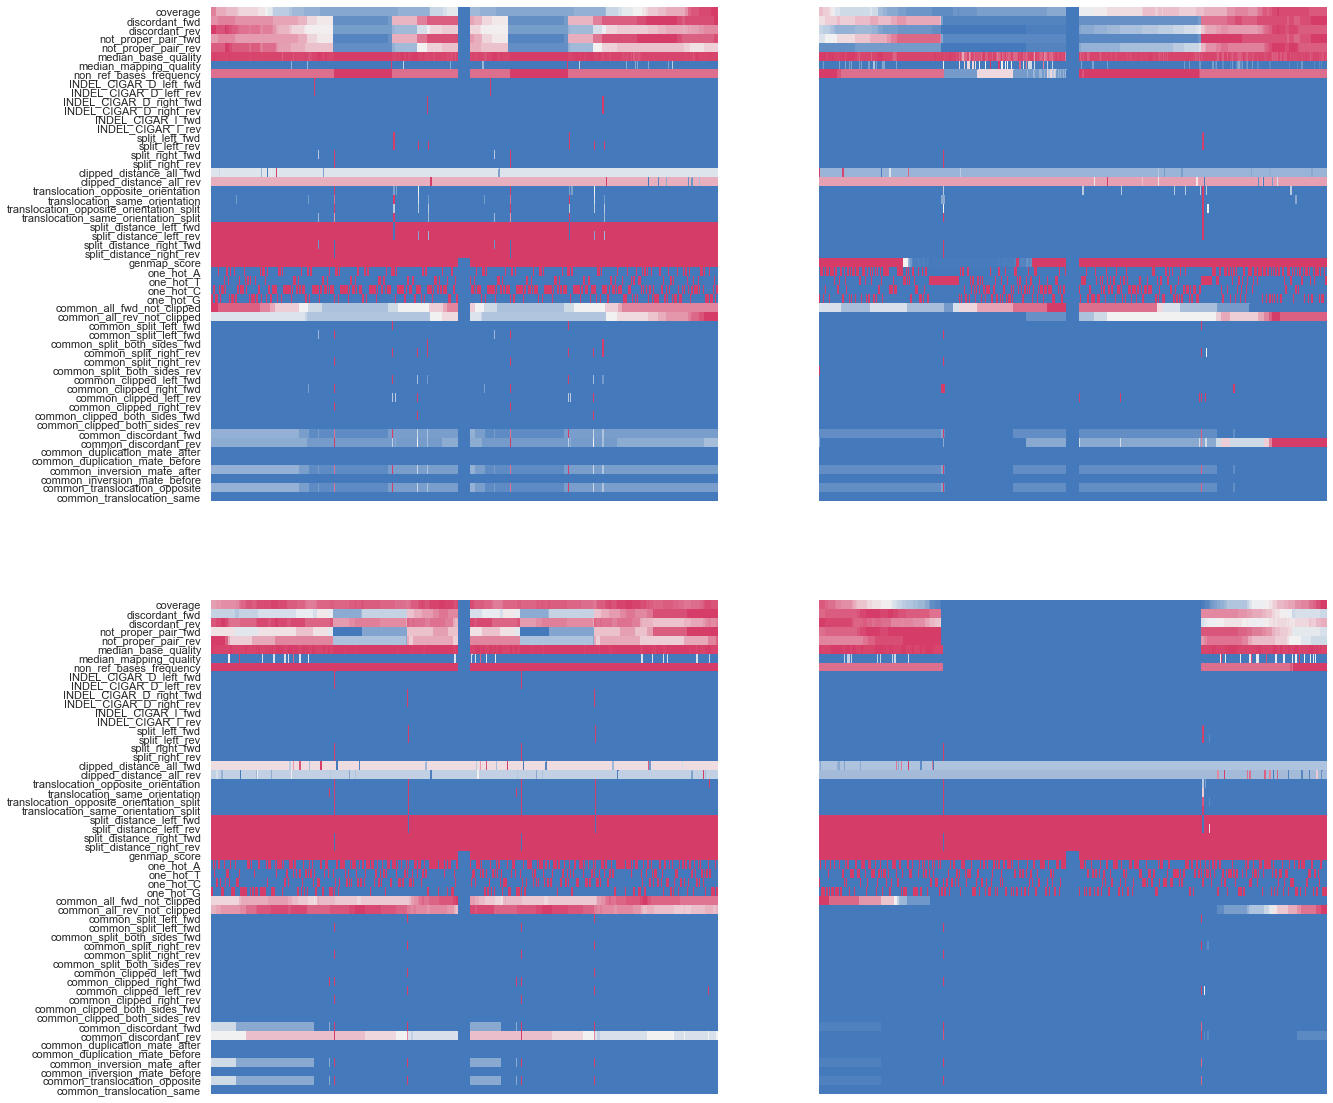

In [15]:
j = 2
a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims, nrows=2, ncols=j)
cmap = sns.diverging_palette(250, 1, as_cmap=True)
for i,v in enumerate(l[:j]):
    sns.heatmap(ax=ax[i%j,0], data=v, cmap=cmap, yticklabels=1, xticklabels=False, cbar=False)
for i,v in enumerate(l[j:]):
    sns.heatmap(ax=ax[i%j,1], data=v, cmap=cmap, yticklabels=False, xticklabels=False, cbar=False)
fig.savefig("output.png")

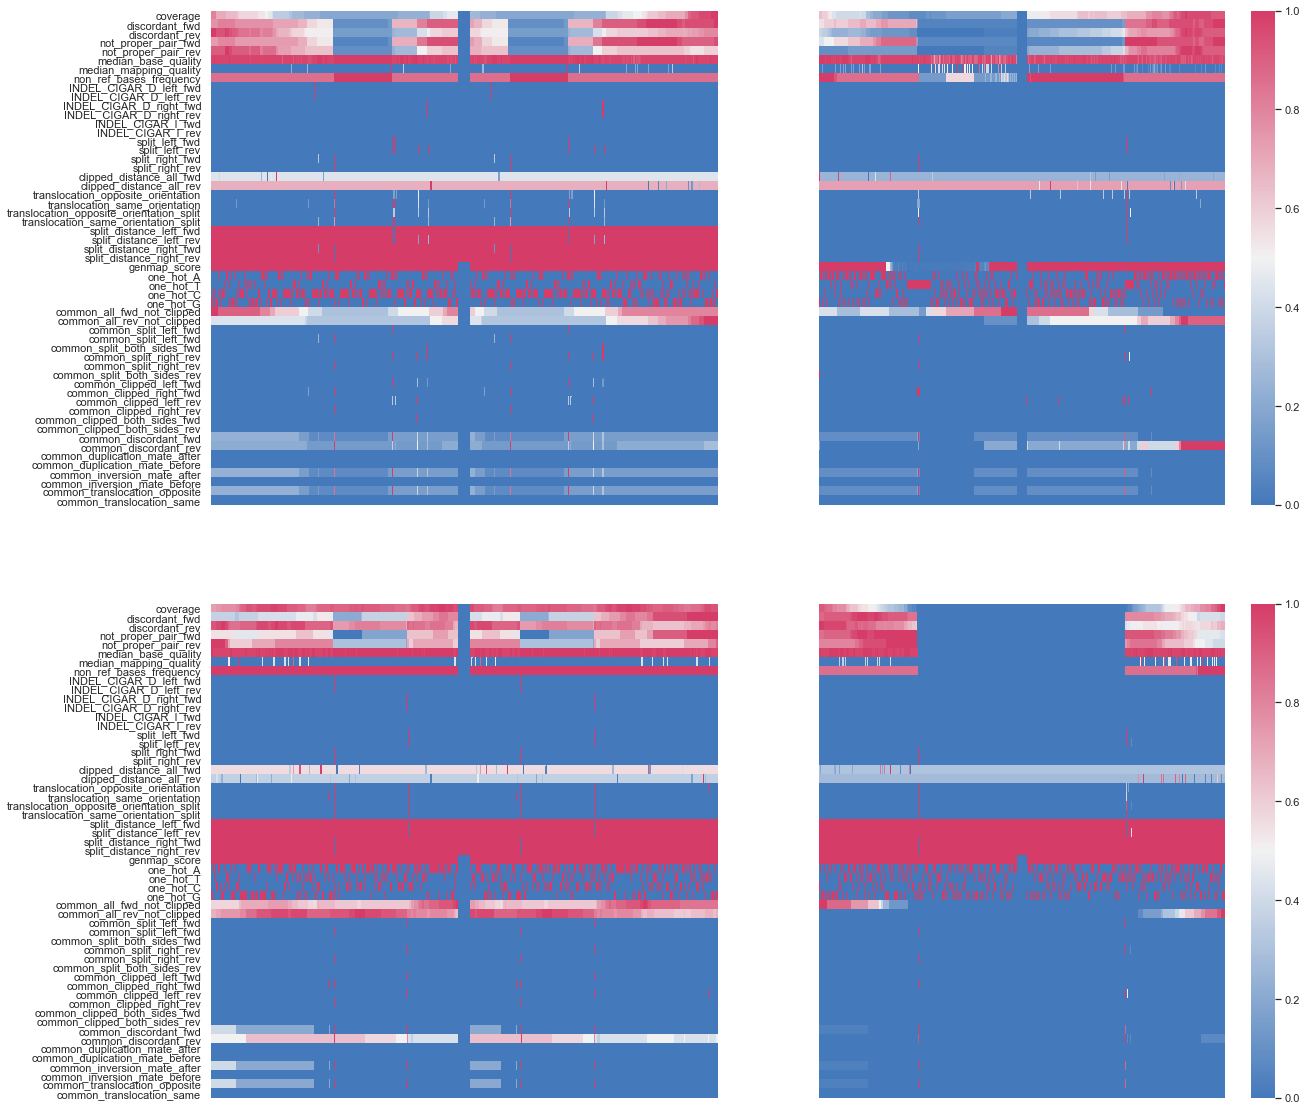

In [16]:
j = 2
a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims, nrows=2, ncols=j)
cmap = sns.diverging_palette(250, 1, as_cmap=True)
for i,v in enumerate(l[:j]):
    sns.heatmap(ax=ax[i%j,0], data=v, cmap=cmap, yticklabels=1, xticklabels=False, cbar=False)
for i,v in enumerate(l[j:]):
    sns.heatmap(ax=ax[i%j,1], data=v, cmap=cmap, yticklabels=False, xticklabels=False, cbar=True)
fig.savefig("output2.png")